# Week1 Adder in Quantum Circuits
This week, we will learn how to perform simple additions using quantum circuits.<br/>
Just like in classical computation, where you can combine different logical gates (e.g., AND, OR, XOR, etc.) to create binary adders, you can make adders wih quantum circuis as well.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### What are quantum circuits,
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's take a look at some of the popular quantum gates.

### X Gate
An X Gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians.
It maps |0> to |1>、|1> to |0>. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

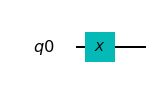

In [2]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

### Z Gate
It equates to a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate'.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

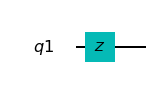

In [3]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.z(q[0])
qc.draw(output='mpl')

### H Gate
A Hadamard gate represents a rotation of $\pi$ about the axis which is just middle of $X$-axis and $Z$-axis.
It maps the basis state |0> to $\frac{|0> + |1>}{\sqrt{2}}$, which means that a measurement will have equal probabilities to become 1 or 0 creating a 'superposition' of states.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

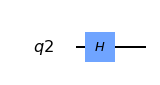

In [4]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

### CX Gate (CNOT Gate)
The controlled NOT gate (or CNOT or CX) acts on 2 qubits, and performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1>$, and otherwise leaves it unchanged.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

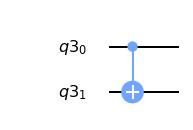

In [5]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### CZ Gate
The CZ gate acts on two qubits (each called a 'controlled bit' and a 'target bit'). It flips the sign (equivalent to applying the phase shift Z gate) of the target qubit if and only if the control qubit is |1>.

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

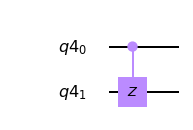

In [6]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

Note: A CZ gate can also be constructed from a CX gate and H gate.

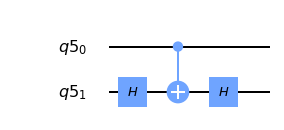

In [7]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

### CCX Gate
The CCX gate is also called a Toffoli gate.
The CCX gate is a 3-bit gate, with two controls and one target as their input and output. When if the first two bits are in the state |1> it applies a Pauli-X (or NOT) on the third bit, else it does nothing.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{pmatrix}$

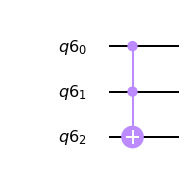

In [8]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

For learning about other quantum gates, please reger to [Summary of Quantum Operations](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/fundamentals/7_summary_of_quantum_operations.ipynb) from qiskit-iqx-tutorials.

## Creating logical gates with quantum gates
Now let's start creating a classic logic gate using quantum gates.
Each gates and their truth tables will be shown. Here we denote quantum registers as 'q', classical registeres as 'c' where we encode the output of the measurement.

### NOT Gate
As it's mentioned before, a X gate can be consider as a NOT gate. Truth table for a NOT Gate looks like this:


|input|output|
|--|--|
|0|1|
|1|0|

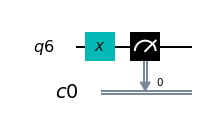

In [8]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])
qc.draw(output='mpl')

### AND Gate
Truth table for an AND Gate looks like this:

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

With a CCX gate, the result of an AND gate for 2 controlled bits will be output to its target bit.

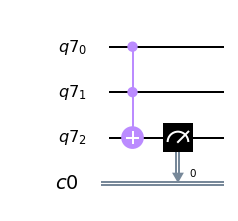

In [9]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NAND Gate
A NAND gate can be made by applying a NOT gate after applying an AND gate.

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

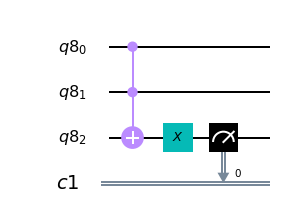

In [10]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### OR Gate

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

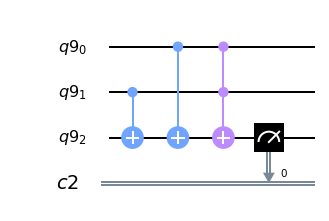

In [11]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### XOR Gate
|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

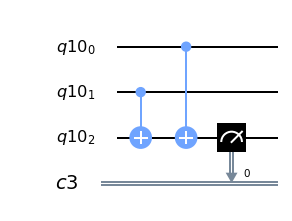

In [12]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NOR Gate

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

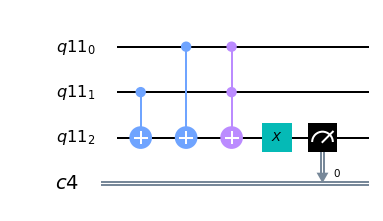

In [13]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

# Adder
An adder is a digial logic circuit that performs addition of numbers. (i.e., $1 + 1$ )

In this example, we are going to take a look at the most simplest adders, namely half adder and full adder.

## Half Adder
The half adder is used to add together the two least significant digits in a binary sum.
It has two single binary inputs, called A and B, and two outputs C(carry out) and S(sum).
The output C will be used as an input to the Full Adder, which will be explained later, for obtaining the value in the higher digit.

Half adders can be described with the truth table shown below.

|A(input)|B(input)|C(carry out)|S(sum)|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|0|1|
|1|0|0|1|
|1|1|1|0|

From the truth table, you should notice that the carry output C is a result of operating an AND gate against A and B、where the output S is a result of operating an XOR against A and B.
As we have already created the AND and XOR gates, we can combine these gates and create a half adder as follows.

We denote our quantum register as 'q', classical registers as 'c', assign inputs A, B to q[0], q[1], the carry output C and sum output S to q[2] and q[3]."

{'00': 1000}


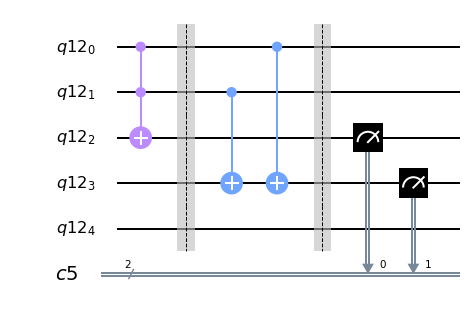

In [14]:
#Define registers and a quantum circuit
q = QuantumRegister(5)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#AND
qc.ccx(q[0], q[1], q[2])

qc.barrier(q)

#XOR
qc.cx(q[1], q[3])
qc.cx(q[0], q[3])

qc.barrier(q)

#Carry out
qc.measure(q[2], c[0])
#Sum
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

# Learning Challenge I
The full adder takes two binary numbers plus an overflow bit as its input, which we will call X.
Create a full adder from a quantum circuit. The truth table for the full adder is given below.

|A(input)|B(input)|X(carry input)|C(carry out)|S(sum)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|0|1|
|0|1|0|0|1|
|0|1|1|1|0|
|1|0|0|0|1|
|1|0|1|1|0|
|1|1|0|1|0|
|1|1|1|1|1|

Denote your quantum register as 'q', classical register as 'c'. Aassign inputs A, B and X to q[0], q[1] and q[2] resepectitely, the carry output C and sum output S to c[0] and c[1].

Find out the execution results from inputs 000 to 111. Then for the full adder circuit where the input is 111, decompose this circuit into single-qubit gates (u3) and CX gates using the adder. 

Example output:<br/>
00,01,01,10,01,... <br/>
{'u3': 27, 'cx': 24}

# Example Answer

By using two half adders and an OR gate, you can create a full adder as shown below.

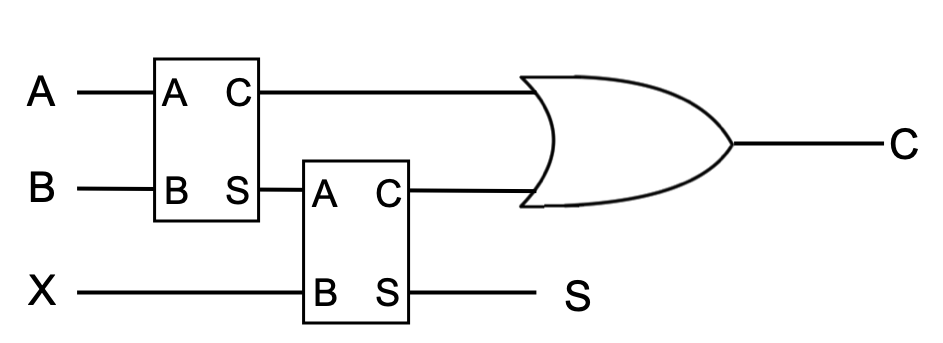

In [1]:
from IPython.display import Image, display
Image('./fig/adder.png')

{'00': 1000}


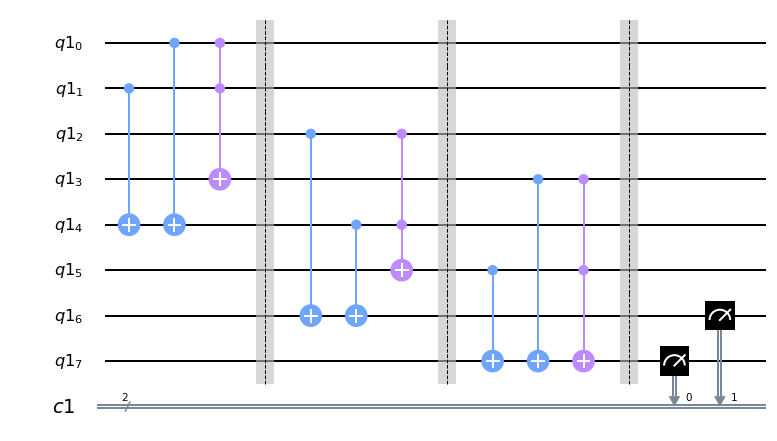

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

#Define registers and a quantum circuit
q = QuantumRegister(8)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

# prepare inputs for testing
# inputdata = [1,1,1] 
# if inputdata[0] == 0:
#     print('0')
# else: 
#     qc.x(q[0])
#     print('1')
# if inputdata[1] == 0:
#     print('0')    
# else: 
#     qc.x(q[1])
#     print('1')
# if inputdata[2] == 0:
#     print('0')    
# else: 
#     qc.x(q[2])
#     print('1')

def OR(a,b,c):
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c])
    qc.ccx(q[a], q[b], q[c])
def hadder(a,b,c,s):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])
    
hadder(0,1,3,4)
qc.barrier(q)
hadder(4,2,5,6)
qc.barrier(q)
OR(3,5,7)
qc.barrier(q)
#measure 
qc.measure(q[7], c[0])
qc.measure(q[6], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

## TIPS: Calculating the Quantum Cost using an Unroller
There are several ways to evaluate a program (quantum circuit).

1. Number of quantum bits
2. Depth
3. Program Execution Speed (Runtime)
4. Number of instructions

These are all important measurements that impact the results and throughput of quantum computation but in this particular challenge, we are using No.4, number of instructions, to evaluate our program. We will call the evaluated value of No.4 a "cost" throughout this challenge.

Cost $=$ single-qubit gates $+$ CX gates $\times 10$

Any given quantum curcuits can be decomposed into single-qubit gates (an instruction given to a single qubit) and two-qubit gates. With the current Noisy Intermediate-Scale Quantum (NISQ) devices, noises are introduced more heavily when implementing CX gates. Therefore, we will weigh CX gates 10 times more than a single-qubit gate for cost evaluation.

You can evaluate gate costs yourself by using a program called "unroller."
Let's take a look at this program.

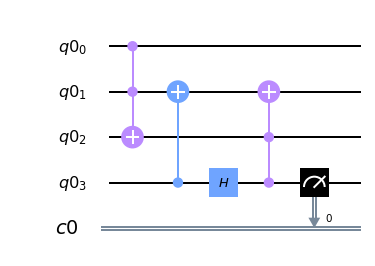

In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [3]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

As you can see, this quantum circuit contains a Hadamard gate, a CX gate and CCX gates. We can decompose this circuit into specific gates which the unroller specifies as shown below.

In [4]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

Thus, the cost of this circuit is $19+13\times10=149$.